In [1]:
import sys
import json
import math
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
# from matplotlib import rc
# rc('font', family="serif")
# rc('font', size=12)
# rc('text', usetex=True)
kit_blue_1 = "#4664AA"
kit_blue_2 = "#7D92C3"

In [2]:
run = "mixed" # writtenwork_depth # musicalwork_breadth # athlete # politician_breadth # species_depth # anatomicalstructure_breadth # wikidata
res_glob = pd.read_csv(f"out/_results_{run}.csv", index_col=0)
display(res_glob[["n_t", "n_b", "m_g"]])

# Control which classes to analyze. Add or remove rows in res_glob DataFrame
# res_glob = res_glob.loc[[
#                         "Newspaper", "NewspaperRandom",
#                         "Poem", "PoemRandom",
#                         "Boxer", "BoxerWikidata",
#                         "Cyclist", "CyclistWikidata",
#                         ]]

# res_disp = res_glob.copy()

# # Format integer
# res_disp["n_t"] = res_disp["n_t"].map("{:,.0f}".format)

# # Format float with four decimals
# res_disp["mean_dens_t"] = res_disp["mean_dens_t"].map("{:,.4f}".format)

,n_t,n_b,m_g
Mixed,500.0,702.0,52958.0
CapitalWikidata,302.0,471.0,19844.0
CountryWikidata,198.0,527.0,33114.0


In [3]:
# Latex table

# res_tex = res_glob[["n_t", "n_b", "ndisc_t", "ndisc_b", "k_t_g", "k_b_g", "k_mean_t", "k_sd_t", "k_mean_b", "k_sd_b", "k_med_t", "k_med_b", "superclass"]]
# res_tex.to_latex("table.tex")

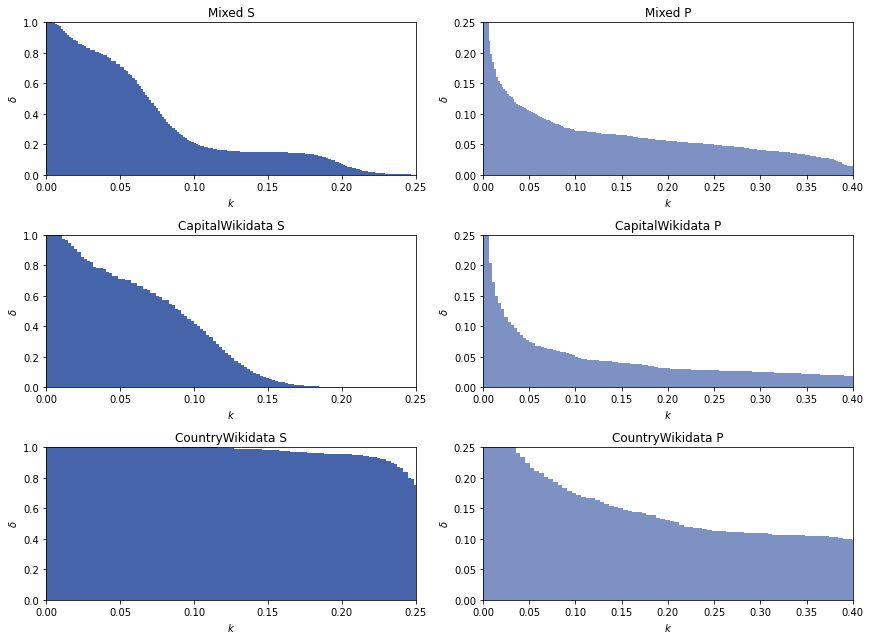

In [4]:
# KNC plots for each superclass and its subclasses

res = res_glob
classes = list(res.index.values)
# classes = [
#     "Boxer",
#     "AmateurBoxer",
# ]

fig, axes = plt.subplots(len(classes), 2, sharex="none", sharey="col", figsize=(12, 3 * len(classes)))

for classname in classes:
    row = classes.index(classname)
    try:
        df_t = pd.read_csv(f"out/{classname}/{classname}.t.knc.csv")
        df_b = pd.read_csv(f"out/{classname}/{classname}.b.knc.csv")
    except FileNotFoundError as e:
        print(classname, e)
    n_t = res.loc[classname, "n_t"]
    n_b = res.loc[classname, "n_b"]

    # Top
    k = []
    dens = []
    ncomp = []
    ncomp_abs = []
    slcc = []
    slcc_abs = []
    has_ncomp = False
    has_slcc = False
    if "ncomponents" in df_t.columns:
        has_ncomp = True
    if "slcc" in df_t.columns:
        has_slcc = True

    for i, knc_row in df_t.iterrows():
        k.append(knc_row["k"] / n_b)
        dens.append(knc_row["density"])
        if has_ncomp:
            ncomp.append((n_t - knc_row["ncomponents"]) / (n_t - 1))
            ncomp_abs.append(knc_row["ncomponents"])
        if has_slcc:
            slcc.append((knc_row["slcc"] - 1) / (n_t - 1))
            slcc_abs.append(knc_row["slcc"])
    
    axes[row, 0].set_title(classname + " S")
    axes[row, 0].set_xlabel("$k$")
    axes[row, 0].set_ylabel("$\delta$")
#     axes[row, 0].plot(k, dens)
#     axes[row, 0].bar(k, ncomp, width=(-1/n_b), align="edge", color="#999999cc")
#     axes[row, 0].bar(k, slcc, width=(-1/n_b), align="edge", color="#999999aa")
    axes[row, 0].bar(k, dens, width=(-1/n_b), align="edge", color=kit_blue_1)
    axes[row, 0].set_xlim(0, 0.25)
    axes[row, 0].set_ylim(0, 1)
#     if has_ncomp and has_slcc:
#         ax2 = axes[row, 0].twinx()
#         k.insert(0, 0)
#         first_ncomp, = ncomp.flat[0]
#         ncomp.insert(0, first_ncomp)
#         first_slcc, = slcc.flat[0]
#         slcc.insert(0, first_slcc)
#         ax2.plot(k, ncomp_abs, color="black", linestyle="dotted")
#         ax2.plot(k, slcc_abs, color="black", linestyle="dashed")
#         ax2.set_ylabel("$ncomp/slcc$")

    # Bot
    k = []
    dens = []
    ncomp = []
    ncomp_abs = []
    slcc = []
    slcc_abs = []
    has_ncomp = False
    has_slcc = False
    if "ncomponents" in df_b.columns:
        has_ncomp = True
    if "slcc" in df_b.columns:
        has_slcc = True

    for i, knc_row in df_b.iterrows():
        k.append(knc_row["k"] / n_t)
        dens.append(knc_row["density"])
        if has_ncomp:
            ncomp.append((n_b - knc_row["ncomponents"]) / (n_b - 1))
            ncomp_abs.append(knc_row["ncomponents"])
        if has_slcc:
            slcc.append((knc_row["slcc"] - 1) / (n_b - 1))
            slcc_abs.append(knc_row["slcc"])

    axes[row, 1].set_title(classname + " P")
    axes[row, 1].set_xlabel("$k$")
    axes[row, 1].set_ylabel("$\delta$")
#     axes[row, 1].plot(k, dens)
#     axes[row, 1].bar(k, ncomp, width=(-1/n_t), align="edge", color="#999999cc")
#     axes[row, 1].bar(k, slcc, width=(-1/n_t), align="edge", color="#999999aa")
    axes[row, 1].bar(k, dens, width=(-1/n_t), align="edge", color=kit_blue_2)
    axes[row, 1].set_xlim(0, 0.4)
    if classname == "DocumentDBLP":
        axes[row, 1].set_xlim(0, 1)
    axes[row, 1].set_ylim(0, 0.25)
#     if has_ncomp and has_slcc:
#         ax2 = axes[row, 1].twinx()
#         k.insert(0, 0)
#         first_ncomp, = ncomp.flat[0]
#         ncomp.insert(0, first_ncomp)
#         first_slcc, = slcc.flat[0]
#         slcc.insert(0, first_slcc)
#         ax2.plot(k, ncomp_abs, color="black", linestyle="dotted")
#         ax2.plot(k, slcc_abs, color="black", linestyle="dashed")
#         ax2.set_ylabel("$ncomp/slcc$")

plt.subplots_adjust(wspace=50, hspace=10)
plt.tight_layout()
# fig.savefig("knc.pdf") # bbox_inches='tight'

,n_t,n_b,m_t,m_b,w_med_t,w_med_b
Mixed,500.0,702.0,124750.0,119472.0,44.0,193.0
CapitalWikidata,302.0,471.0,45451.0,52120.0,48.0,14.0
CountryWikidata,198.0,527.0,17877.0,94746.0,141.0,194.0


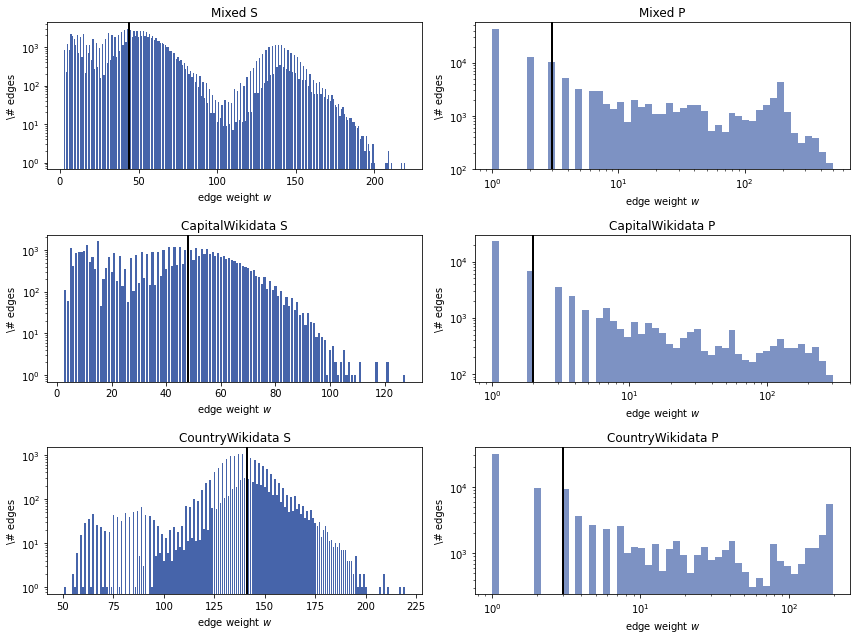

In [5]:
# Weight hist top and bot

res = res_glob
classes = list(res.index.values)
# classes = [
#     "WrittenWork",
#     "AcademicJournal",
# ]

display(res_glob[["n_t", "n_b", "m_t", "m_b", "w_med_t", "w_med_b"]])

fig, axes = plt.subplots(nrows=len(classes), ncols=2, sharex="none", sharey="none", figsize=(12, 3 * len(classes)))
for classname in classes:
    row = classes.index(classname)
    # Top (density dist)
    w = []
    pw = []
    with open(f"out/{classname}/{classname}.t.w.json", "r") as input_file:
        dist = json.load(input_file)
    median = res.loc[classname, "w_med_t"]
    for weight, count in dist.items():
        if int(weight) > 0:
            w.append(int(weight))
            pw.append(count)
    axes[row, 0].bar(w, pw, align='center', color=kit_blue_1)
    axes[row, 0].axvline(median, color='k', linewidth=2)
    axes[row, 0].set_title(classname + " S")
    axes[row, 0].set_yscale("log")
    axes[row, 0].tick_params(axis="x", reset=True, top=False)
    axes[row, 0].set_xlabel("edge weight $w$")
    axes[row, 0].set_ylabel("\# edges")
    # Bot (hist)
    w = []
    with open(f"out/{classname}/{classname}.b.w.json", "r") as input_file:
        dist = json.load(input_file)
    for weight, count in dist.items():
        if int(weight) > 0:
            w.extend([int(weight)] * count)
    
    logbins = np.geomspace(min(w), max(w), 50)
    axes[row, 1].set_xscale("log")
    axes[row, 1].set_yscale("log")
    axes[row, 1].set_title(classname + " P")
    axes[row, 1].set_xlabel("edge weight $w$")
    axes[row, 1].set_ylabel("\# edges")
    axes[row, 1].axvline(np.median(w), color='k', linewidth=2)
    hist, bins, _ = axes[row, 1].hist(w, bins=logbins, color=kit_blue_2)
    emptybins = 0
    for patchobj in _:
        if patchobj.get_height() == 0:
            emptybins += 1

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()
# fig.savefig("wdist.pdf")

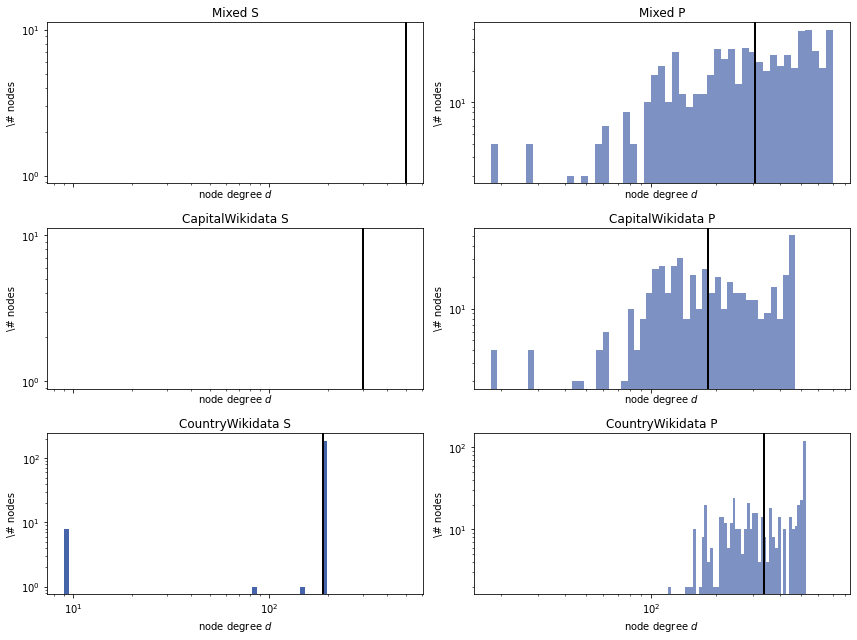

In [6]:
# Degree histogram of top and bot onemode graphs (log log scale)

res = res_glob
classes = list(res.index.values)
# classes = [
#     "Athlete",
#     "Boxer",
# ]
nrows = len(classes)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="col", sharey="none", figsize=(12, 3 * nrows))
for classname in classes:
    row = classes.index(classname)
    # Top
    with open(f"out/{classname}/{classname}.t.k.json", "r") as input_file:
        dist = json.load(input_file)
    n_t = res.loc[classname, "n_t"]
    k = []
    for degree, count in dist.items():
        k.extend([int(degree)] * count)

    logbins = np.geomspace(min(k), max(k), 50) # geomspace cannot include 0 (disc nodes)
    axes[row, 0].set_xscale("log")
    axes[row, 0].set_yscale("log")
    axes[row, 0].set_title(classname + " S")
    axes[row, 0].axvline(np.median(k), color='k', linewidth=2)
    axes[row, 0].set_xlabel("node degree $d$")
    axes[row, 0].set_ylabel("\# nodes")
    # min_ylim, max_ylim = axes[row, 0].get_ylim()
    # axes[row, 0].text(np.median(k) * 1.1, max_ylim * 0.9, 'Mean: {:.2f}'.format(np.median(k))) # Draw median value
    hist, bins, _ = axes[row, 0].hist(k, bins=logbins, color=kit_blue_1)
    # Bot
    with open(f"out/{classname}/{classname}.b.k.json", "r") as input_file:
        dist = json.load(input_file)
    n_b = res.loc[classname, "n_b"]
    k = []
    for degree, count in dist.items():
        k.extend([int(degree)] * count)

    logbins = np.geomspace(min(k), max(k), 50)
    axes[row, 1].set_xscale("log")
    axes[row, 1].set_yscale("log")
    axes[row, 1].set_title(classname + " P")
    axes[row, 1].axvline(np.median(k), color='k', linewidth=2)
    axes[row, 1].set_xlabel("node degree $d$")
    axes[row, 1].set_ylabel("\# nodes")
    hist, bins, _ = axes[row, 1].hist(k, bins=logbins, color=kit_blue_2)

# display(res_disp[["n_t", "n_b", "ndisc_t", "ndisc_b", "k_t_g", "k_b_g", "k_mean_t", "k_sd_t", "k_mean_b", "k_sd_b", "k_med_t", "k_med_b", "superclass"]])

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()
# fig.savefig("ddist.pdf") #, bbox_inches='tight', dpi=300)

In [7]:
# Latex table wdist
# res_tex = res_disp[["n_t", "n_b", "m_t", "m_b", "w_med_t", "w_med_b", "superclass"]]
# # display(res_tex)
# res_tex.to_latex("table_wdist.tex")

In [8]:
# Mean of weight distributions for subjects
# If mean > median, distribution is right skewed
# If mean < median, distribution is left skewed
res = res_glob
classes = list(res.index.values)
for classname in classes:
    w_mean_t = 0
    m_t = res.loc[classname]["m_t"]
    w_med_t = res.loc[classname]["w_med_t"]
    with open(f"out/{classname}/{classname}.t.w.json", "r") as input_file:
        wdist = json.load(input_file)
    for weight, count in wdist.items():
        w_mean_t += int(weight) * (count / m_t)
    if w_mean_t > w_med_t:
        skewness = "right skewed"
    else:
        skewness = "left skewed"
    print(classname, w_mean_t, w_med_t, skewness)

Mixed 57.113643286573186 44.0 right skewed
CapitalWikidata 39.96745946183802 48.0 left skewed
CountryWikidata 138.11092465178726 141.0 left skewed


,n_t,n_b,k_t_g,k_b_g,c_mean_t,c_sd_t,c_mean_b,c_sd_b,c_med_t,c_med_b
Mixed,500.00,702.00,105.92,75.44,"28,499.71","11,648.27","10,290.25","15,498.97","27,708.50",896.00
CapitalWikidata,302.00,471.00,65.71,42.13,"12,030.21","4,225.34","3,348.88","5,722.08","13,282.50",440.00
CountryWikidata,198.00,527.00,167.24,62.83,"24,939.48","5,435.76","10,714.30","13,307.01","26,142.50","1,874.00"


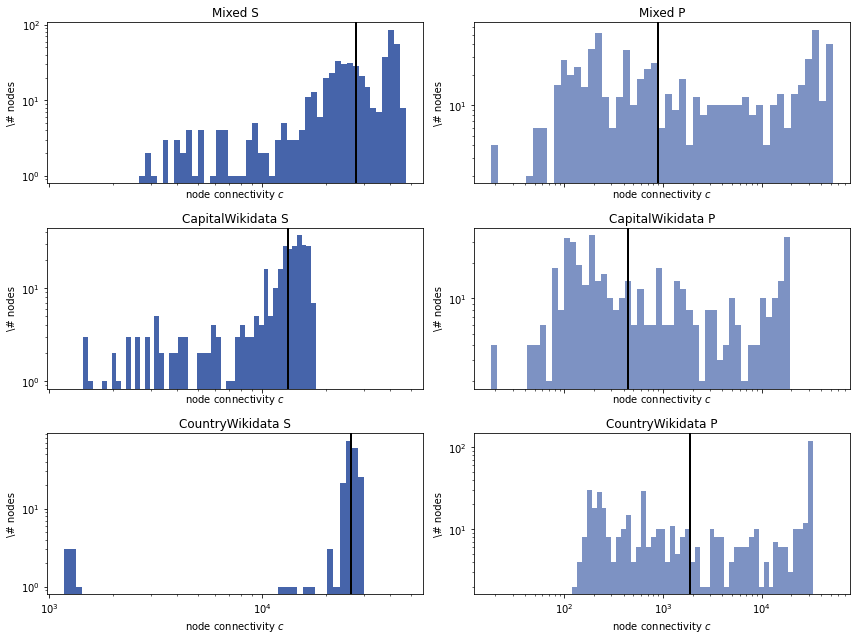

In [9]:
# Connectivity histogram of top and bot onemode graphs

res = res_glob
classes = list(res.index.values)
# classes = [
#     "WrittenWork",
#     "AcademicJournal",
# ]

pd.options.display.float_format = '{:,.2f}'.format
display(res[["n_t", "n_b", "k_t_g", "k_b_g", "c_mean_t", "c_sd_t", "c_mean_b", "c_sd_b", "c_med_t", "c_med_b"]])

nrows = len(classes)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="col", sharey="none", figsize=(12, 3 * nrows))
for classname in classes:
    row = classes.index(classname)
    # Top
    with open(f"out/{classname}/{classname}.t.c.json", "r") as input_file:
        dist = json.load(input_file)
    c = []
    for connectivity, count in dist.items():
        c.extend([int(connectivity)] * count)

    logbins = np.geomspace(min(c), max(c), 50) # geomspace cannot include 0 (disc nodes)
    axes[row, 0].set_xscale("log")
    axes[row, 0].set_yscale("log")
    axes[row, 0].set_title(classname + " S")
    axes[row, 0].axvline(np.median(c), color='k', linewidth=2)
    axes[row, 0].set_xlabel("node connectivity $c$")
    axes[row, 0].set_ylabel("\# nodes")
    hist, bins, _ = axes[row, 0].hist(c, bins=logbins, color=kit_blue_1)
    # Bot
    with open(f"out/{classname}/{classname}.b.c.json", "r") as input_file:
        dist = json.load(input_file)
    c = []
    for connectivity, count in dist.items():
        c.extend([int(connectivity) for i in range(0, count)])

    logbins = np.geomspace(min(c), max(c), 50)
    axes[row, 1].set_xscale("log")
    axes[row, 1].set_yscale("log")
    axes[row, 1].set_title(classname + " P")
    axes[row, 1].axvline(np.median(c), color='k', linewidth=2)
    axes[row, 1].set_xlabel("node connectivity $c$")
    axes[row, 1].set_ylabel("\# nodes")
    hist, bins, _ = axes[row, 1].hist(c, bins=logbins, color=kit_blue_2)

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()
# fig.savefig("cdist.pdf") #, bbox_inches='tight', dpi=300)

In [10]:
# Latex table connectivity
# res_tex = res_disp[["w_med_t", "w_med_b", "c_med_t", "c_med_b", "c_sd_t", "c_sd_b"]]
# display(res_tex)
# res_tex.to_latex("table.tex")

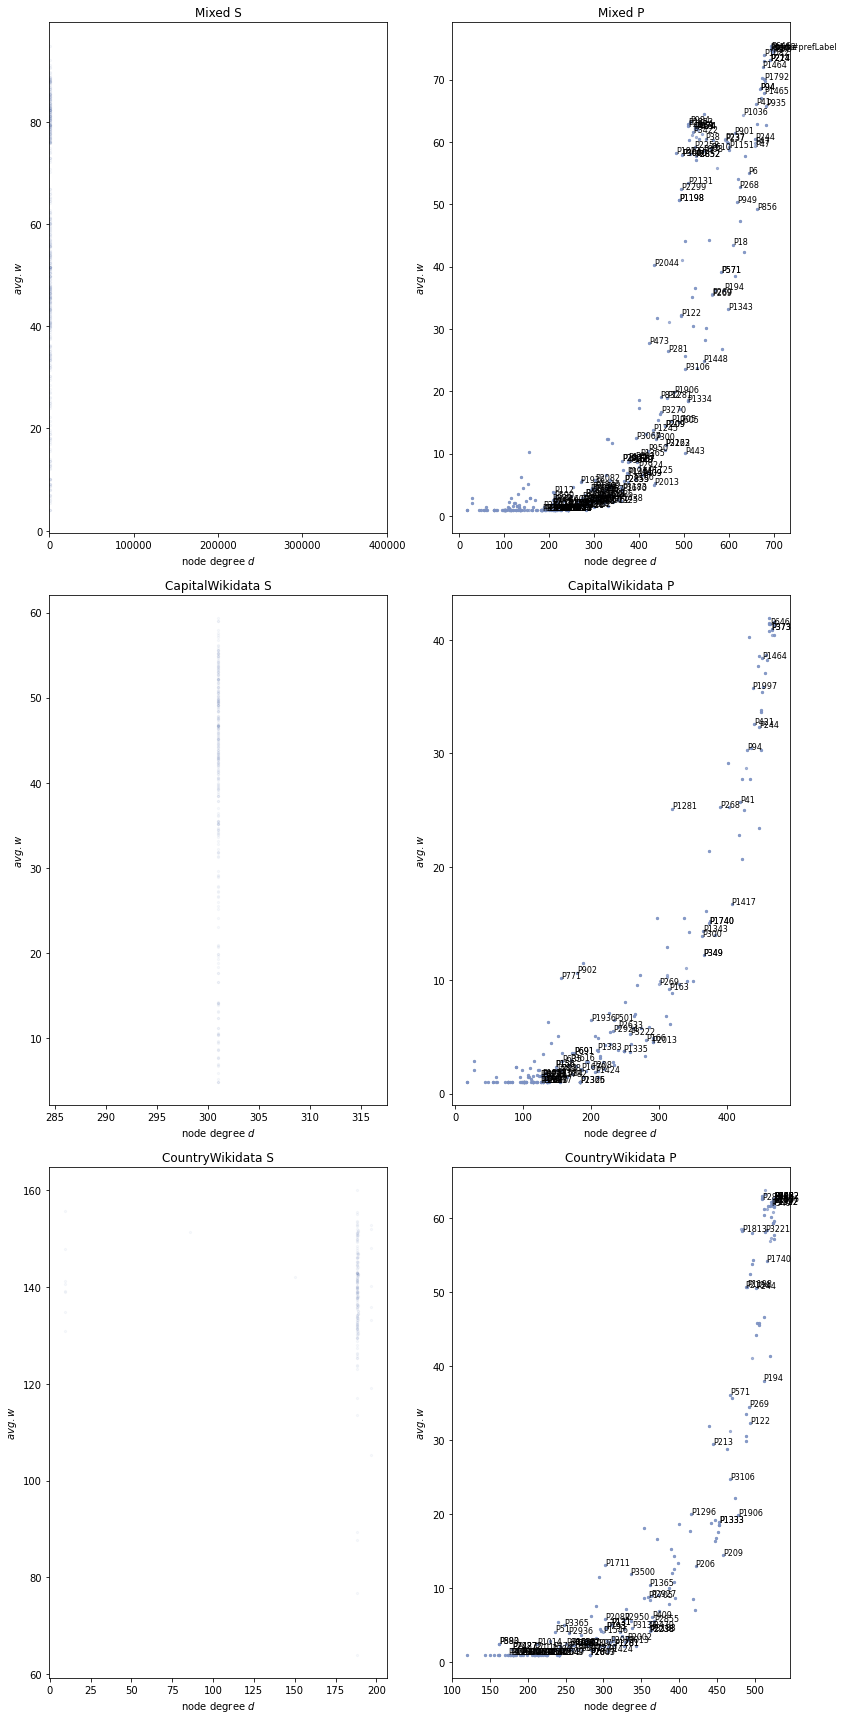

In [11]:
# Average edge weight (connectivity based) over degree per entity scatterplot

res = res_glob
classes = list(res.index.values)
# classes = [
#     "Athlete",
#     "Boxer",
# ]
nrows = len(classes)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="none", sharey="none", figsize=(12, nrows*8))
n_t_super = res["n_t"].iloc[0]
n_b_super = res["n_b"].iloc[0]
for classname in classes:
    row = classes.index(classname)
    # Top
    n = []
    k = []
    c = []
    with open(f"out/{classname}/{classname}.t.nk.json", "r") as input_file:
        nk_dist = json.load(input_file)
    with open(f"out/{classname}/{classname}.t.nc.json", "r") as input_file:
        nc_dist = json.load(input_file)

    for key, value in nk_dist.items():
        n.append(key.split('/')[-1][:9])
        k.append(value)
        c.append(nc_dist.get(key) / value)

    axes[row, 0].set_title(classname + " S")
    axes[row, 0].set_xlabel("node degree $d$")
    axes[row, 0].set_ylabel("$avg. w$")
    axes[row, 0].scatter(k, c, s=5, color=kit_blue_1+"0a")
#     Only annotate some entities
#     n_t = res.loc[classname, "n_t"]
#     n_t_th = round(np.interp(n_t, [0, n_t_super], [100, 600]))
#     print(f"n_t_th {classname} {n_t_th}")
#     for i, label in enumerate(n): 
#         if (round(c[i]) % 2 == 0 and i % n_t_th == 0):
#             label = label.replace("_", "")
#             label = label.replace("\\", "")
#             axes[row, 1].annotate(label, (k[i], c[i]), fontsize=8)
    # Bot
    n = []
    k = []
    c = []
    with open(f"out/{classname}/{classname}.b.nk.json", "r") as input_file:
        nk_dist = json.load(input_file)
    with open(f"out/{classname}/{classname}.b.nc.json", "r") as input_file:
        nc_dist = json.load(input_file)

    for key, value in nk_dist.items():
        n.append(key.split('/')[-1])
        k.append(value)
        c.append(nc_dist.get(key) / value)
    
    axes[row, 1].set_title(classname + " P")
    axes[row, 1].set_xlabel("node degree $d$")
    axes[row, 1].set_ylabel("$avg. w$")
    axes[row, 1].scatter(k, c, s=5, color=kit_blue_2+"aa")
    n_b = res.loc[classname, "n_b"]
    n_b_th = round(np.interp(n_b, [0, n_b_super], [12, 3]))
    for i, label in enumerate(n): # Annotate only some entities
        if ((k[i] > (axes[row, 1].get_xlim()[1] * 0.25) and i % n_b_th == 0)
            or (c[i] > (axes[row, 1].get_ylim()[1] * 0.25) and i % n_b_th == 0)):
            axes[row, 1].annotate(label, (k[i], c[i]), fontsize=8)

axes[0, 0].set_xticks([0, 100000, 200000, 300000, 400000])

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()
# fig.savefig("ckscatter.png", bbox_inches='tight', dpi=300)

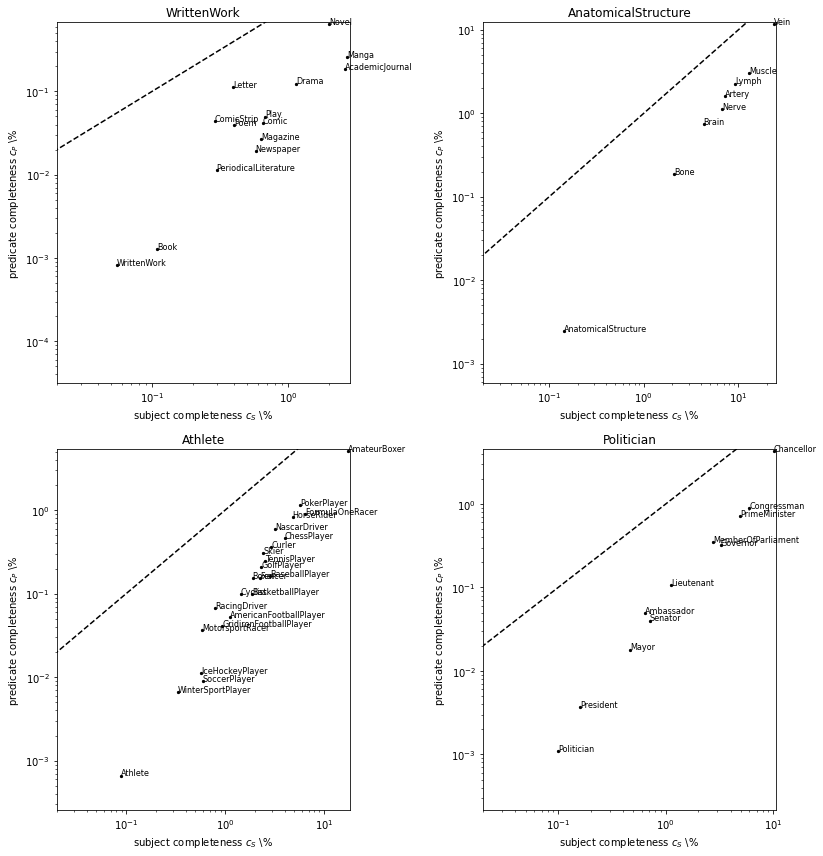

In [12]:
# rc_t over rc_b (in %) for each class and each run scatterplot
runs = [
    "writtenwork_depth",
    "anatomicalstructure_breadth",
    "athlete",
    "politician_breadth",
]

nrows = math.ceil(len(runs) / 2)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="none", sharey="none", figsize=(12, nrows*6))
for run in runs:
    label = []
    sclass = []
    subj = []
    pred = []
    res = pd.read_csv(f"out/_results_{run}.csv", index_col=0)
    for classname in res.index.values:
        label.append(classname)
        sclass.append(res.loc[classname, "superclass"])
        subj.append(res.loc[classname, "rc_dens_t"] * 100)
        pred.append(res.loc[classname, "rc_dens_b"] * 100)

    runnr = runs.index(run)
    row = math.floor(runnr / 2)
    col = runnr % 2
#     axes[row, col].set_title(run.split("_")[0])
    axes[row, col].set_xlabel("subject completeness $c_{S}$ \%")
    axes[row, col].set_ylabel("predicate completeness $c_{P}$ \%")
    axes[row, col].scatter(subj, pred, marker="o", s=5, color="black")
    for i, label in enumerate(label):
        axes[row, col].annotate(label, (subj[i], pred[i]), fontsize=8)

    xmin, xmax = axes[row, col].get_xlim()
    ymin, ymax = axes[row, col].get_ylim()
    axes[row, col].set_xlim(0.02, xmax)
    axes[row, col].set_ylim(ymin - (ymin * 1.001), ymax)

    axes[row, col].set_xscale("log")
    axes[row, col].set_yscale("log")

    axes[row, col].autoscale(False)

    origin_x = np.linspace(0.001,100,3)
    origin_y = origin_x
    axes[row, col].plot(origin_x, origin_y, color="black", linestyle="dashed")

axes[0, 0].set_title("WrittenWork")
axes[0, 1].set_title("AnatomicalStructure")
axes[1, 0].set_title("Athlete")
axes[1, 1].set_title("Politician")
    
plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()
# fig.savefig("rc-eachrun.pdf") #, bbox_inches='tight', dpi=300)

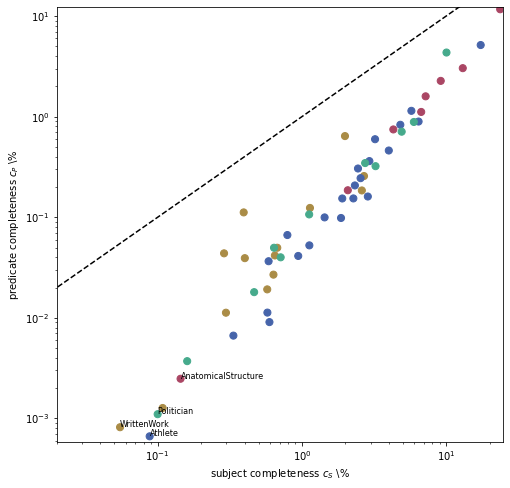

In [13]:
# rc_t over rc_b (in %) for each class and each run in one single scatterplot
runs = [
    "writtenwork_depth",
    "anatomicalstructure_breadth",
    "athlete",
    "politician_breadth",
]

label = []
subj = []
pred = []
color = []

for run in runs:
    res = pd.read_csv(f"out/_results_{run}.csv", index_col=0)
    for classname in res.index.values:
        if classname in ["WrittenWork", "AnatomicalStructure", "Athlete", "Politician"]:
            label.append(classname)
        else:
            label.append("")
        subj.append(res.loc[classname, "rc_dens_t"] * 100)
        pred.append(res.loc[classname, "rc_dens_b"] * 100)
        if run == "writtenwork_depth":
            color.append("#aa8c46")
        elif run == "anatomicalstructure_breadth":
            color.append("#aa4664")
        elif run == "athlete":
            color.append("#4664aa")
        elif run == "politician_breadth":
            color.append("#46aa8c")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.set_xlabel("subject completeness $c_{S}$ \%")
ax.set_ylabel("predicate completeness $c_{P}$ \%")
ax.scatter(subj, pred, marker="o", s=50, color=color)
for i, label in enumerate(label):
    ax.annotate(label, (subj[i], pred[i]), fontsize=8)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.set_xlim(0.02, xmax)
ax.set_ylim(ymin - (ymin * 1.001), ymax)

ax.set_xscale("log")
ax.set_yscale("log")

ax.autoscale(False)

origin_x = np.linspace(0.001,100,3)
origin_y = origin_x
origin_line = ax.plot(origin_x, origin_y, color="black", linestyle="dashed")
# fig.savefig("rc-allruns.pdf") #, bbox_inches='tight', dpi=300)

In [14]:
# Latex table

# res = res_glob
# # Control which classes to analyze. Add or remove rows in res DataFrame
# classes = list(res.index.values)

# res_tex = res_disp[["n_t", "n_b", "ratio_sp", "dens_t", "dens_b", "k_0_t", "k_0_b", "rc_dens_t", "rc_dens_b", "rel_rc_t", "rel_rc_b", "superclass"]]
# display(res_tex)
# res_tex.to_latex("table.tex")

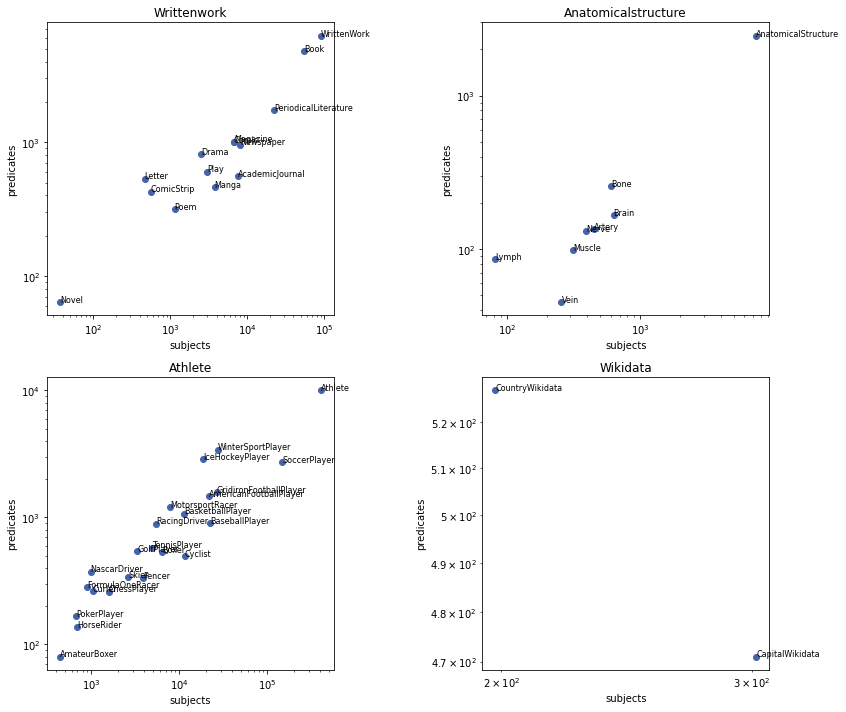

In [15]:
# Number of subjects and predicates per class

res = res_glob

runs = [
    "writtenwork_depth",
    "anatomicalstructure_breadth",
    "athlete",
    "wikidata",
]

nrows = math.ceil(len(runs) / 2)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="none", sharey="none", figsize=(12, nrows*5))
for run in runs:
    res = pd.read_csv(f"out/_results_{run}.csv", index_col=0)
    runnr = runs.index(run)
    row = math.floor(runnr / 2)
    col = runnr % 2
    axes[row, col].set_title(run.split("_")[0].title())
    axes[row, col].set_xlabel("subjects")
    axes[row, col].set_ylabel("predicates")
    
    axes[row, col].scatter(res["n_t"], res["n_b"], color=kit_blue_1, marker="o")
    for i, label in enumerate(res.index):
        axes[row, col].annotate(label, (res["n_t"][i], res["n_b"][i]), fontsize=8)
    axes[row, col].set_xscale("log")
    axes[row, col].set_yscale("log")
    axes[row, col].set_xlabel("subjects")
    axes[row, col].set_ylabel("predicates")

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

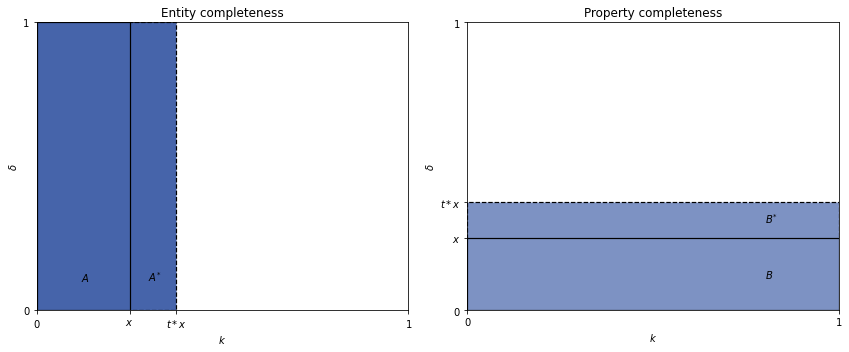

In [16]:
# Types of completeness

fig, axes = plt.subplots(1, 2, sharex="none", sharey="none", figsize=(12, 5))

lw = 1.2
x = 0.25
xt = 0.375

axes[0].set_title("Entity completeness")
axes[0].set_xlabel("$k$")
axes[0].set_ylabel("$\delta$")
axes[0].set_xticks(ticks=[0, x, xt, 1])
axes[0].set_xticklabels(["$0$", "$x$", "$t*x$", "$1$"])
axes[0].set_yticks(ticks=[0, 1])
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].bar(0, 1, width=xt, align="edge", color=kit_blue_1, edgecolor="black", linestyle="--", linewidth=lw)
axes[0].bar(0, 1, width=x, align="edge", color=kit_blue_1, edgecolor="black", linestyle="-", linewidth=lw, label="mylabel")
# ax2.plot(k, ncomp_abs, color="black", linestyle="dotted")
axes[0].annotate("$A$", xy=(0.12, 0.1))
axes[0].annotate("$A^{*}$", xy=(0.3, 0.1))

axes[1].set_title("Property completeness")
axes[1].set_xlabel("$k$")
axes[1].set_ylabel("$\delta$")
axes[1].set_xticks(ticks=[0, 1])
axes[1].set_yticks(ticks=[0, x, xt, 1])
axes[1].set_yticklabels(["$0$", "$x$", "$t*x$", "$1$"])
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].bar(0, xt, width=1, align="edge", color=kit_blue_2, edgecolor="black", linestyle="--", linewidth=lw)
axes[1].bar(0, x, width=1, align="edge", color=kit_blue_2, edgecolor="black", linestyle="-", linewidth=lw)
# ax2.plot(k, ncomp_abs, color="black", linestyle="dotted")
axes[1].annotate("$B$", xy=(0.8, 0.11))
axes[1].annotate("$B^{*}$", xy=(0.8, 0.3))

plt.subplots_adjust(wspace=50, hspace=10)
plt.tight_layout()
# fig.savefig("completeness-types.pdf") # bbox_inches='tight'

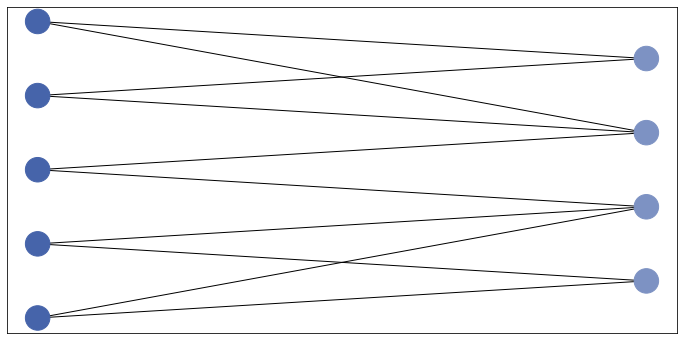

In [17]:
# Example bipartite graphs
import copy

G = nx.Graph()
top = ["Clara", "Eusebius", "Florestan", "Pierrot", "Robert"]
bot = ["dateofbirth", "friend", "member", "key"]
G.add_nodes_from(top, bipartite=0)
G.add_nodes_from(bot, bipartite=1)
# Full connected graph
# G.add_edges_from([("Clara","dateofbirth"),("Clara","friend"),("Clara","member"),("Clara","key"),
#                     ("Eusebius","dateofbirth"),("Eusebius","friend"),("Eusebius","member"),("Eusebius","key"),
#                     ("Florestan","dateofbirth"),("Florestan","friend"),("Florestan","member"),("Florestan","key"),
#                     ("Pierrot","dateofbirth"),("Pierrot","friend"),("Pierrot","member"),("Pierrot","key"),
#                     ("Robert","dateofbirth"),("Robert","friend"),("Robert","member"),("Robert","key")])
# FiveFour graph
# G.add_edges_from([("Clara","dateofbirth"),("Clara","friend"),("Clara","member"),
#                     ("Eusebius","dateofbirth"),("Eusebius","friend"),("Eusebius","member"),
#                     ("Florestan","dateofbirth"),("Florestan","friend"),("Florestan","member"),("Florestan","key"),
#                     ("Pierrot","friend"),("Pierrot","member"),
#                     ("Robert","key")])
# Disconnected graph
# G.add_edges_from([("Clara","dateofbirth"),
#                     ("Eusebius","friend"),
#                     ("Florestan","member"),
#                     ("Pierrot","key")])
# Two Cluster graph
G.add_edges_from([("Clara","dateofbirth"),("Clara","friend"),
                    ("Eusebius","dateofbirth"),("Eusebius","friend"),
                    ("Florestan","friend"),("Florestan","member"),
                    ("Pierrot","member"),("Pierrot","key"),
                    ("Robert","member"),("Robert","key")])

color_dict = {0: kit_blue_1, 1: kit_blue_2}
color_list = [color_dict[i[1]] for i in G.nodes.data("bipartite")]
# print(f"n_t {len(top)}, n_b {len(bot)}, m {G.number_of_edges()}")

# bi_layout = nx.bipartite_layout(G, top, align="horizontal", aspect_ratio=20, scale=1)
# nx.draw_networkx(G, bi_layout, font_size=10, edge_color="grey", node_color=color_list)

bot_len = len(bot)
pos = dict()
pos.update((n, (0.1, i*0.2)) for i, n in enumerate(top))
pos.update((n, (0.3, i*0.2 + 0.1)) for i, n in enumerate(bot))
labelpos = copy.deepcopy(pos)

fig, axes = plt.subplots(1, 1, figsize=(12, 6))
# limitss = axes.axis('off')
# limitsp = axes.axis('off')

nx.draw_networkx(G, pos=pos, ax=axes, font_size=12, node_size=600, edge_color="black", node_color=color_list, with_labels=False)
# nx.draw_networkx_edges(G, pos=pos, ax=axes, edge_color="black")
# nx.draw_networkx_labels(G, pos=pos, ax=axes, font_size=20)

# fig.savefig("graph.pdf")

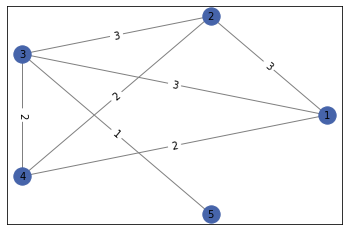

In [18]:
# Example onemode graphs
G = nx.Graph()
# Top mode
# FiveFour graph
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_weighted_edges_from([(1,2,3),(1,3,3),(1,4,2),
                            (2,3,3),(2,4,2),
                            (3,4,2),(3,5,1)])

nx.draw_networkx(G, pos=nx.circular_layout(G, scale=1), font_size=10, edge_color="grey", node_color=kit_blue_1)
labels = nx.get_edge_attributes(G, 'weight')
_ = nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G, scale=1), edge_labels=labels, font_size=10)

# Full connected graph
# G.add_edges_from([(1,"a"),(1,"b"),(1,"c"),(1,"d"),
#                     (2,"a"),(2,"b"),(2,"c"),(2,"d"),
#                     (3,"a"),(3,"b"),(3,"c"),(3,"d"),
#                     (4,"a"),(4,"b"),(4,"c"),(4,"d"),
#                     (5,"a"),(5,"b"),(5,"c"),(5,"d")])

# Disconnected graph
# G.add_edges_from([(1,"a"),
#                     (2,"b"),
#                     (3,"c"),
#                     (4,"d")])
# 2 Cluster graph
# G.add_edges_from([(1,"a"),(1,"b"),
#                     (2,"a"),(2,"b"),
#                     (3,"b"),(3,"c"),
#                     (4,"c"),(4,"d"),
#                     (5,"c"),(5,"d")])

# G.add_nodes_from(["a", "b", "c", "d"])